# Deep Learning - LSTM

## BRZOZOWSKI MAREK

## An avocado sale dataset will be used to explore:

## Predicting Volume of sale for avocados using LSTM class of Deep Neural Networks 


Neural Networks are a series algorithms for building a computer program that learns from data. It loosely resembles the way our human brains operate. Neurons in the simplest form are links that activate on certain responses whether chemical signals or data inputs for computers. As the brain evolves to create new linking neurons so to does nequral networks as they adapt to changing inputs. 

Long Short Term Memory (LSTM) are artifical neural networks that are one of the most powerful dynamic classifier. LSTM are a Recurrent Neural Network (RNN) where the outputs from the previous step are fed as inputs into the current step, or generalized as feed-forward neural networks. RNN have trouble with memory which is why LSTM were develeoped. Three gates names as Forget gate, Input Gate, and Output gate are the core componenets of the memory cell of a LSTM.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from pylab import rcParams

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


In [3]:
rcParams['figure.figsize'] = (20,12)

In [4]:
# Loading data
data = pd.read_csv('Avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
# Find the splitting ratio
split = (data['year']!=2018).sum()/len(data)
split

0.9289824099950682

In [6]:
# Dropping all data except Total Volume
data = data.drop(['Unnamed: 0','Date','AveragePrice','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region'],axis = 1)
data.head()

,Total Volume
0,64236.62
1,54876.98
2,118220.22
3,78992.15
4,51039.60


In [7]:
fig_data = data.copy()

In [8]:
# Scaling data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [9]:
# Transposing data to change the shape
data = data.T
np.shape(data)

(1, 18249)

In [10]:
# Pulling only the data out. Could be done by DATAFRAME.values
data = data[0]
np.shape(data)

(18249,)

In [11]:
data

array([0.00102634, 0.0008766 , 0.00189   , ..., 0.0002189 , 0.00025791,
       0.00027846])

In [12]:
# LSTM step fuctions
def LSTM_shift(data,hist_len,split_ratio):

    # Open empty lists
    xs,ys = [],[]

    # Append Data in LSTM steps
    for i in range(len(data)-hist_len-1):
        ys.append(data[i+hist_len])
        xs.append(data[i:i+hist_len])

    # Separate data for training set 2015-2017 and testing set 2018
    j = int(len(data)*split_ratio) 

    # Return tests and training set
    return np.array(xs[:j]),np.array(xs[j:]),np.array(ys[:j]),np.array(ys[j:])

# Step sets for LSTM 
# If we have data = [1,2,3,4,5,6] these sets should work the following manner
#  model [1,2,3] should predict 4 if we set our length to 3.
hist_len = 10

#Splitting the data

x_train, x_test, y_train, y_test = LSTM_shift(data,hist_len,split)
x_test.shape

(1285, 10)

In [13]:
# Reshape input to be 3D [Samples, Features, Steps]
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))

In [14]:
# LSTM MODEL setup
model = Sequential()
model.add(LSTM(256,input_shape=(hist_len,1)))
model.add(Dense(5))
model.add(Dropout(0.1))
model.add(Dense(1))

model.summary()

# Compile model
model.compile(optimizer='adam', loss='mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 265,483
Trainable params: 265,483
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fit LSTM model with the train and test data
history = model.fit(x_train, y_train, epochs=10,batch_size=100, validation_data=(x_test,y_test),shuffle=False)

Train on 16953 samples, validate on 1285 samples
Epoch 1/10
16953/16953 [==============================] - 4s 220us/step - loss: 6.3238e-04 - val_loss: 1.0513e-05
Epoch 2/10
16953/16953 [==============================] - 2s 134us/step - loss: 8.9030e-04 - val_loss: 5.8912e-06
Epoch 3/10
16953/16953 [==============================] - 2s 134us/step - loss: 6.0430e-04 - val_loss: 2.3688e-06
Epoch 4/10
16953/16953 [==============================] - 2s 135us/step - loss: 3.4550e-04 - val_loss: 2.3345e-06
Epoch 5/10
16953/16953 [==============================] - 2s 134us/step - loss: 3.2082e-04 - val_loss: 2.3695e-06
Epoch 6/10
16953/16953 [==============================] - 2s 135us/step - loss: 6.1504e-04 - val_loss: 2.2159e-06
Epoch 7/10
16953/16953 [==============================] - 2s 134us/step - loss: 5.6480e-04 - val_loss: 2.5754e-06
Epoch 8/10
16953/16953 [==============================] - 2s 139us/step - loss: 4.1782e-04 - val_loss: 2.1804e-06
Epoch 9/10
16953/16953 [===============

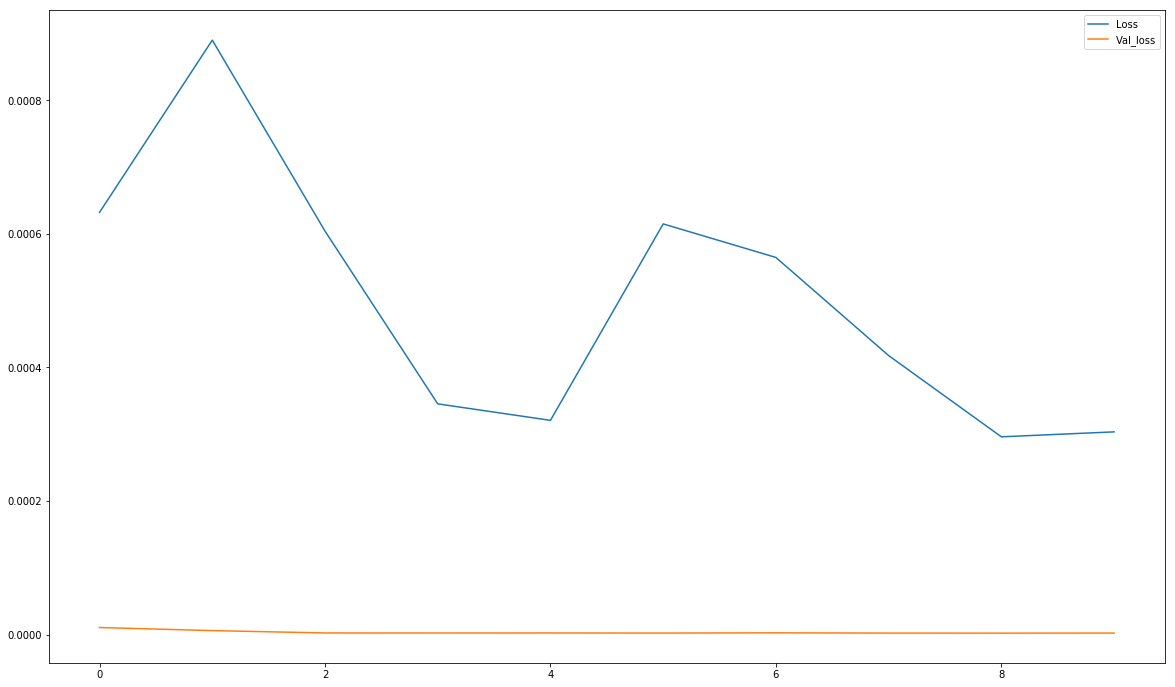

In [42]:
# Plotting Loss and Validation loss
fig1=plt.plot(history.history['loss'],label='Loss')
fig2=plt.plot(history.history['val_loss'],label='Val_loss')
plt.legend()
plt.show()

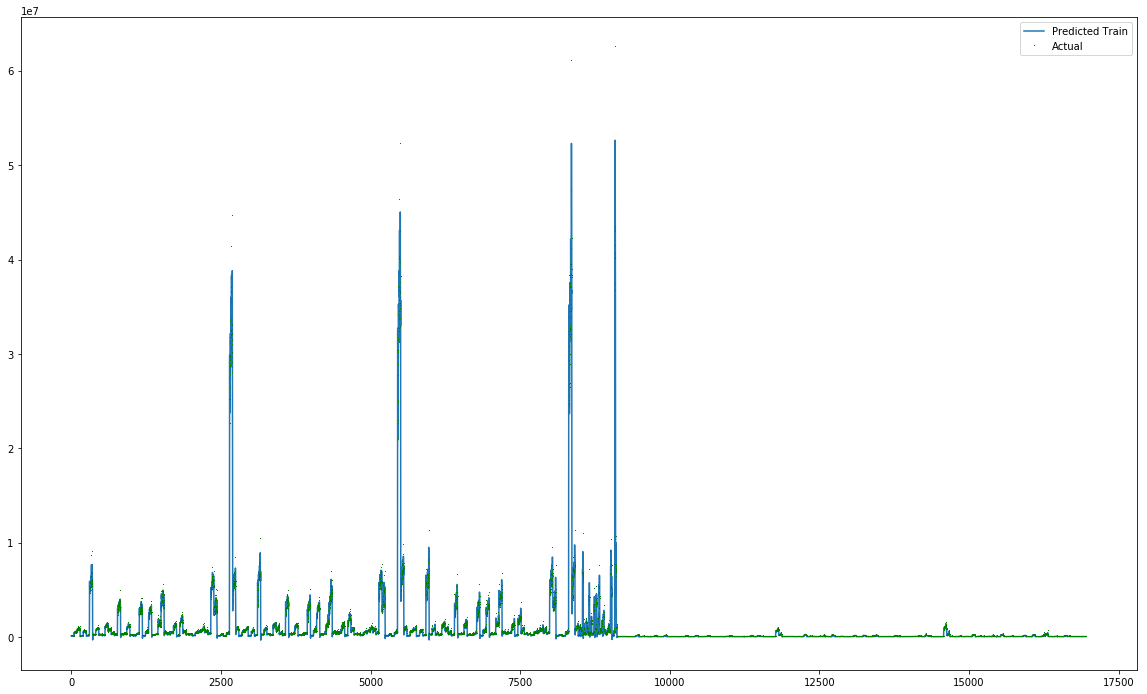

In [43]:
predicted_train = model.predict(x_train)
plt.plot(scaler.inverse_transform(predicted_train),label='Predicted Train')
plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)),',',color='green', label = 'Actual')
plt.legend()

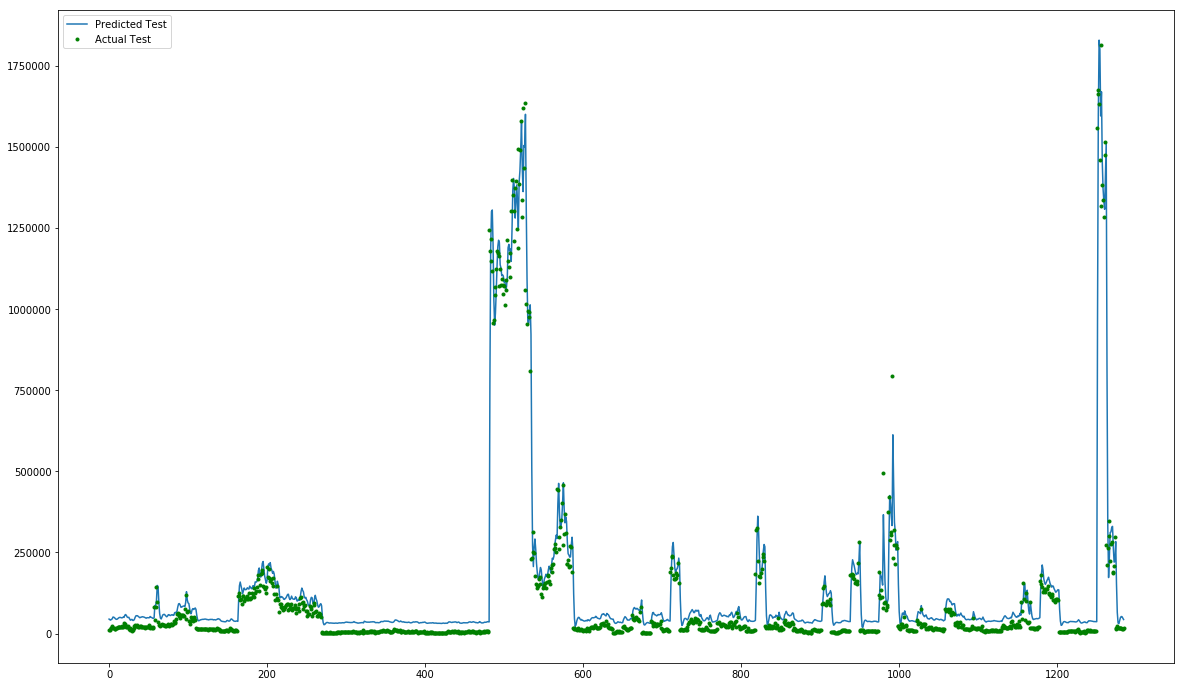

In [44]:
predicted_test = model.predict(x_test)
fig1 = plt.plot(scaler.inverse_transform(predicted_test), label ='Predicted Test')
fig2 = plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),'.',color='green', label ='Actual Test')
plt.legend( )
plt.show()

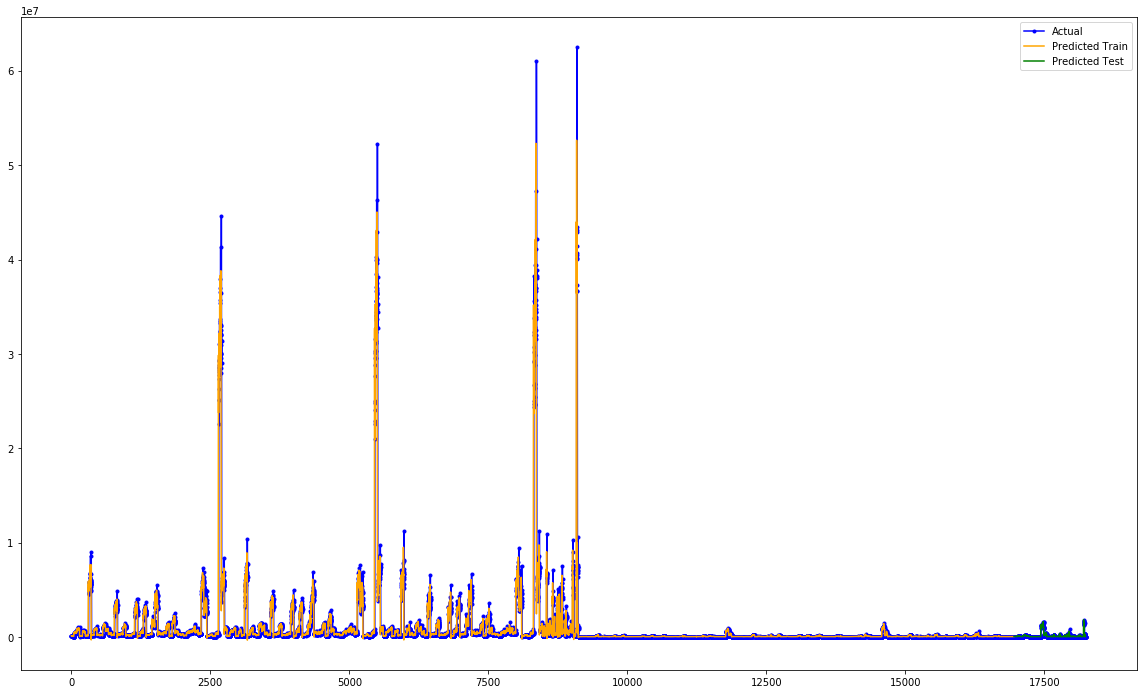

In [47]:
trainPredictPlot = np.empty_like(fig_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(predicted_train)+1, :] = scaler.inverse_transform(predicted_train)

testPredictPlot = np.empty_like(fig_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(predicted_train)+(1*2):len(predicted_train)+len(predicted_test)+2, :] = scaler.inverse_transform(predicted_test)

#plot baseline and predictions
plt.plot(fig_data, '.-', color = 'blue', label = 'Actual')
plt.plot(trainPredictPlot,color = 'orange', label = 'Predicted Train')
plt.plot(testPredictPlot,color = 'green', label = 'Predicted Test')

plt.legend()
plt.show()

In [45]:
# Calculate the sum of the volume for the last 12 months using the prediction

sum_predicted = scaler.inverse_transform(predicted_test).sum()
sum_predicted

178235490.0

In [46]:
# Retrieve the sum of the volume for the last 12 months.
sum_test = (scaler.inverse_transform(y_test.reshape(-1,1)).sum())
sum_test

141050355.59

In [50]:
difference = sum_test/sum_predicted
difference

0.7913707711788575

In [57]:
rmse = (mean_squared_error(scaler.inverse_transform(predicted_test), scaler.inverse_transform(y_test.reshape(-1,1))))**0.5
print('Test RMSE: %.3f' % rmse)

Test RMSE: 93409.139
